In [173]:
import pandas as pd
import scipy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import statsmodels as sm

Get Financial Data

In [2]:
!wget -nc https://www.lazyprogrammer.me/course_files/sp500sub.csv

--2021-12-29 20:41:22--  https://www.lazyprogrammer.me/course_files/sp500sub.csv
Resolving www.lazyprogrammer.me (www.lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to www.lazyprogrammer.me (www.lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lazyprogrammer.me/course_files/sp500sub.csv [following]
--2021-12-29 20:41:23--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  4.01MB/s    in 6.5s    

2021-12-29 20:41:30 (3.72 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [125]:
df = pd.read_csv("/content/sp500sub.csv", index_col='Date', parse_dates=True)

In [126]:
df['Name'].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [127]:
google = df[df['Name']=="GOOG"]

In [128]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000.0,GOOG
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900.0,GOOG
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100.0,GOOG
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600.0,GOOG
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900.0,GOOG


Calculating Returns

In [129]:
google['Return_GOOG'] = google['Adj Close'].pct_change(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Name,Return_GOOG
Date,,,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000.0,GOOG,NaN
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900.0,GOOG,-0.004404
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100.0,GOOG,-0.025209
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600.0,GOOG,-0.023280
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900.0,GOOG,0.013331


In [141]:
apple = df[df['Name']=="AAPL"]
apple['Return_apple'] = apple['Close'].pct_change(1)
apple.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,Name,Return_apple
Date,,,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400.0,AAPL,NaN
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200.0,AAPL,0.001729
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000.0,AAPL,-0.015906
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800.0,AAPL,-0.001849
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700.0,AAPL,0.006648


Calculating Alpha & Beta of Google compared to the S&P500 Market

Alpha quantifies how much better google performs than the S&P 500

Beta is the trend that google follows with the S&P 500

In [142]:
joined = google[['Return_GOOG']].join(apple['Return_apple'])

In [143]:
joined.iloc[200:250]

,Return_GOOG,Return_apple
Date,,
2010-10-19,-0.015995,-0.026761
2010-10-20,0.000247,0.003360
2010-10-21,0.006596,-0.003252
2010-10-22,0.000882,-0.006623
2010-10-25,0.006481,0.004456
2010-10-26,0.003406,-0.002558
2010-10-27,-0.003443,-0.000714
2010-10-28,0.003423,-0.008414
2010-10-29,-0.007889,-0.013956


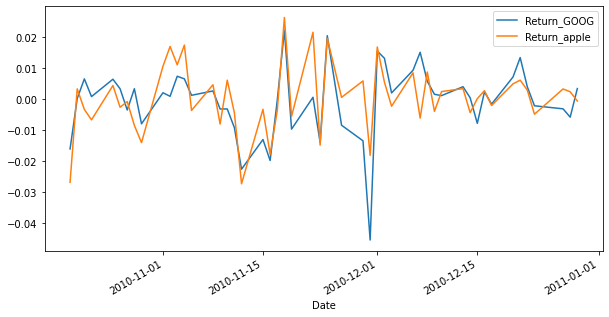

In [144]:
joined.iloc[200:250].plot(figsize=(10,5))

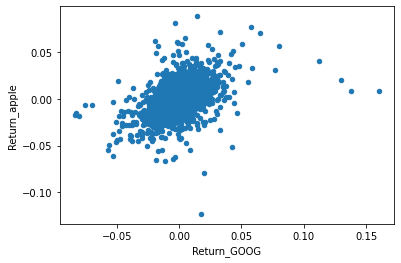

In [145]:
joined.plot.scatter('Return_GOOG', 'Return_apple')

In [146]:
joined.dropna(inplace=True)

In [147]:
X = joined[['Return_GOOG']].to_numpy()
y = joined[['Return_apple']].to_numpy()

In [148]:
X.shape, y.shape

((2262, 1), (2262, 1))

In [149]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [150]:
print(f"Alpha: {model.intercept_}")
print(f"Beta: {model.coef_}")

Alpha: [0.00054357]
Beta: [[0.47642484]]


Modelling a T Dristribution to simulate prices

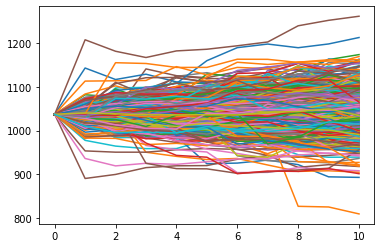

In [164]:
og = []
for _ in range(500):
  df, loc, scale = t.fit(google['Return_GOOG'].dropna())
  prices = [google['Close'][-1]]
  for _ in range(0, 10):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1+r)
    prices.append(p)
  og.append(prices)

for o in og:
  plt.plot(o)

og = np.array(og)


In [165]:
print(og.mean())
print(og.max())
print(og.min())

1041.046509964456
1261.2292030303893
809.5413828821966


In [161]:
print(google['Close'][-1])
google.tail()

1037.0799560546877


,Open,High,Low,Close,Adj Close,Volume,Name,Return_GOOG
Date,,,,,,,,
2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000.0,GOOG,-0.029592
2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300.0,GOOG,-0.003389
2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300.0,GOOG,0.064780
2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800.0,GOOG,0.004252
2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800.0,GOOG,-0.006514


Plotting the T distribution

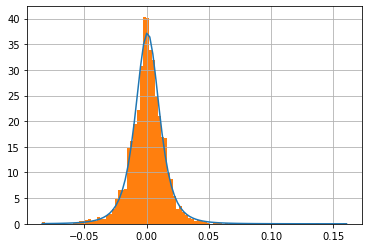

In [171]:
x_space = np.linspace(google['Return_GOOG'].min(), google['Return_GOOG'].max(), 100)
df, loc, scale = t.fit(google['Return_GOOG'].dropna())
y_list = t.pdf(x_space, df, loc, scale)

plt.plot(x_space, y_list)
google['Return_GOOG'].hist(bins=100, density=True)

95 % confidence Interval -- It will tell you the range taken up by the mean value

In [210]:
google_return = joined['Return_GOOG'].dropna().to_numpy()
google_return_mean = google_return.mean()
google_return_std = google_return.std(ddof=1)

low = google_return_mean - 1.96 * google_return_std / np.sqrt(len(google_return))
high = google_return_mean + 1.96 * google_return_std / np.sqrt(len(google_return))

print(google_return_mean, google_return_std, low, high)

0.0006488877545276502 0.01542914921084502 1.3042037828647443e-05 0.001284733471226653


[]

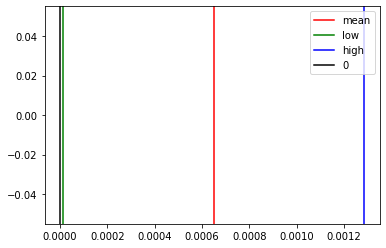

In [211]:
plt.axvline(google_return_mean, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='blue')
plt.axvline(0, label='0', color='black')
plt.legend()
plt.plot()